<a href="https://colab.research.google.com/github/carlosprr29/ai-progetto-spagnoli/blob/main/notebooks/Exploratory_Data_Analysis_WELFake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =================================================================
# PROYECTO: Detección de Fake News con BERT
# FASE: Exploratory Data Analysis (EDA) - Dataset WELFake
# =================================================================

# 1. INSTALACIÓN Y CARGA DE LIBRERÍAS
# -----------------------------------------------------------------
print(" Instalando y cargando librerías...")
!pip install -q datasets pandas matplotlib seaborn wordcloud

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datasets import load_dataset
import warnings

warnings.filterwarnings('ignore') # Para limpiar el output de avisos innecesarios

In [ ]:
# 2. CARGA DEL DATASET DESDE HUGGING FACE
# -----------------------------------------------------------------
print(" Cargando dataset WELFake (esto puede tardar un minuto)...")
dataset_raw = load_dataset("davanstrien/WELFake")
df = pd.DataFrame(dataset_raw['train'])

# Limpieza inicial: eliminar filas con nulos y duplicados
df = df.dropna(subset=['title', 'text', 'label'])
df = df.drop_duplicates()
print(f" Dataset cargado correctamente con {len(df)} filas.")

In [ ]:
# 3. ANÁLISIS DE BALANCE DE CLASES (Gráfico de barras)
# -----------------------------------------------------------------
print("\n Generando gráfico de balance de clases...")
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='label', palette='viridis')
plt.title('Distribución de Noticias (0: Real, 1: Fake)')
plt.xticks([0, 1], ['Real', 'Fake'])
plt.show()

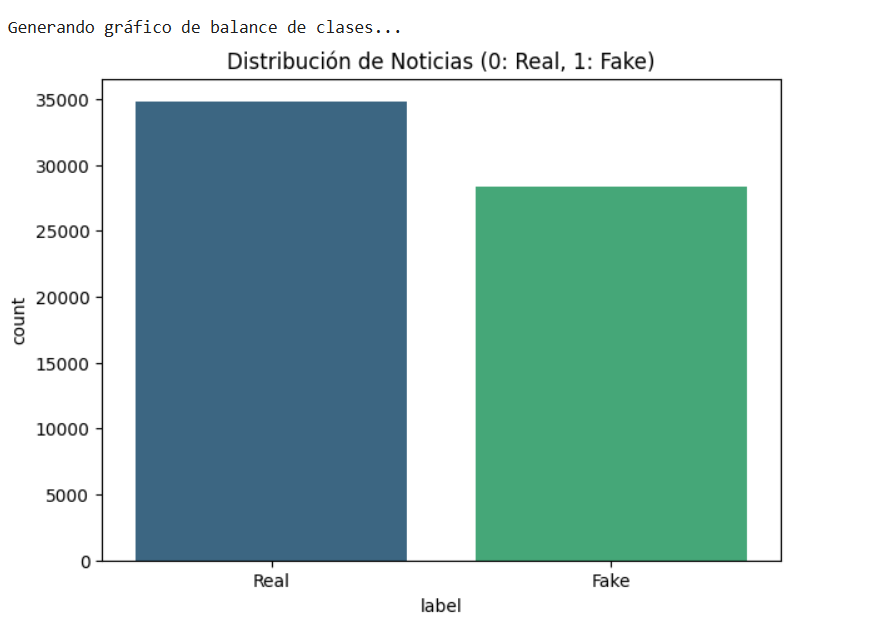

In [ ]:
# 4. EXPLORACIÓN DE CONTENIDO (Muestreo)
# -----------------------------------------------------------------
print("\n Visualizando 5 noticias al azar del dataset:")
display(df[['title', 'label']].sample(5))

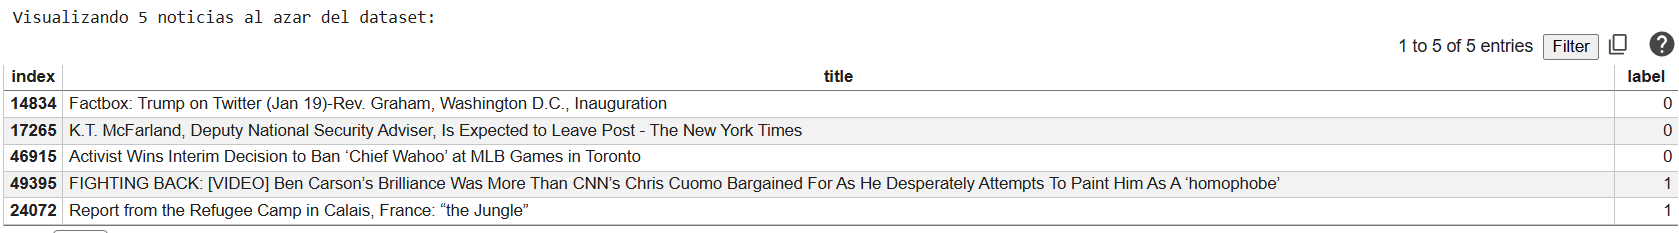![image.png
)

In [ ]:
# 5. ANÁLISIS DE LONGITUD DE TÍTULOS
# ----------------------------------------------------------------
print("\n Analizando longitud de los títulos...")
df['title_len'] = df['title'].astype(str).apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='title_len', hue='label', kde=True, bins=100, palette='magma')
plt.title('Comparativa de longitud de Títulos: Reales vs Fake')
plt.xlim(0, 200) # Centramos la vista en el rango más común
plt.xlabel('Cantidad de caracteres')
plt.show()

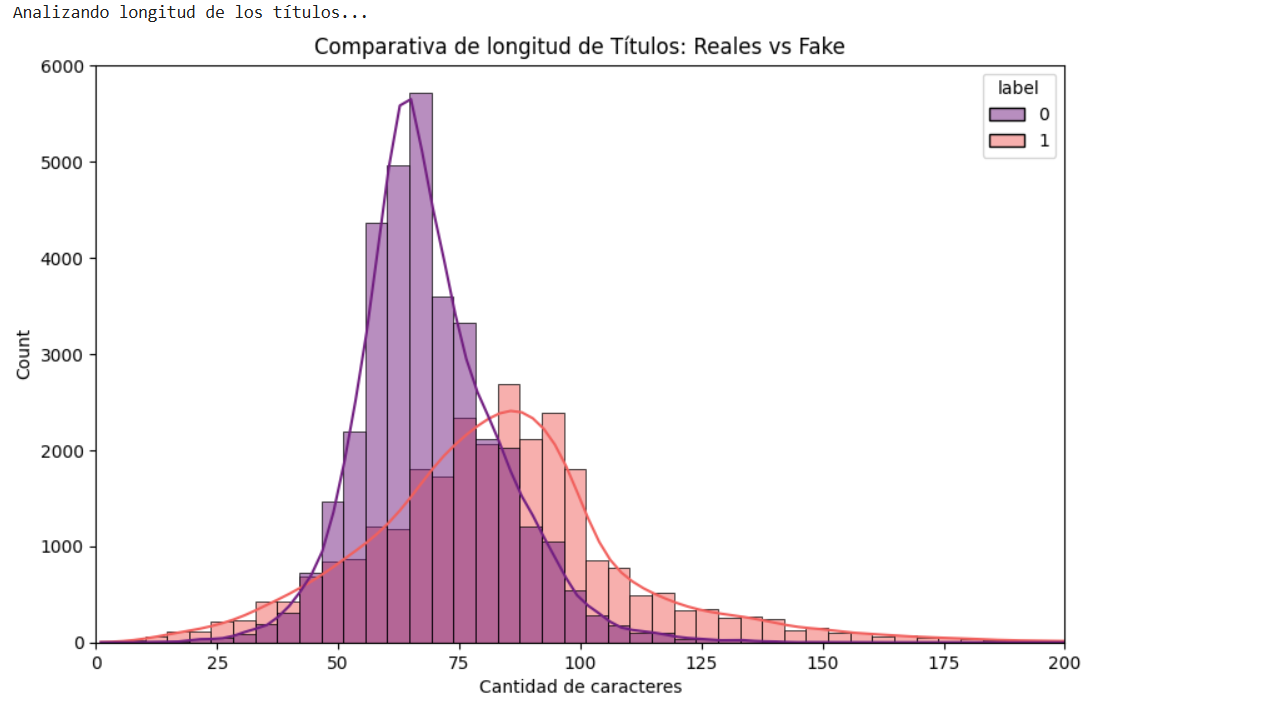

In [ ]:
# 6. GENERACIÓN DE NUBES DE PALABRAS (Visualización de términos)
# -----------------------------------------------------------------
print("\n Generando nubes de palabras (WordClouds)...")

def generar_nube(clase, titulo_grafico, mapa_color):
    texto = " ".join(df[df['label'] == clase]['title'].astype(str))
    wc = WordCloud(width=800, height=400, background_color='white',
                   max_words=100, colormap=mapa_color).generate(texto)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(titulo_grafico, fontsize=16)
    plt.axis('off')
    plt.show()

# Nube para noticias Reales (label 0)
generar_nube(0, "Palabras más comunes en Títulos REALES", "ocean")

# Nube para noticias Fake (label 1)
generar_nube(1, "Palabras más comunes en Títulos FAKE", "Reds")

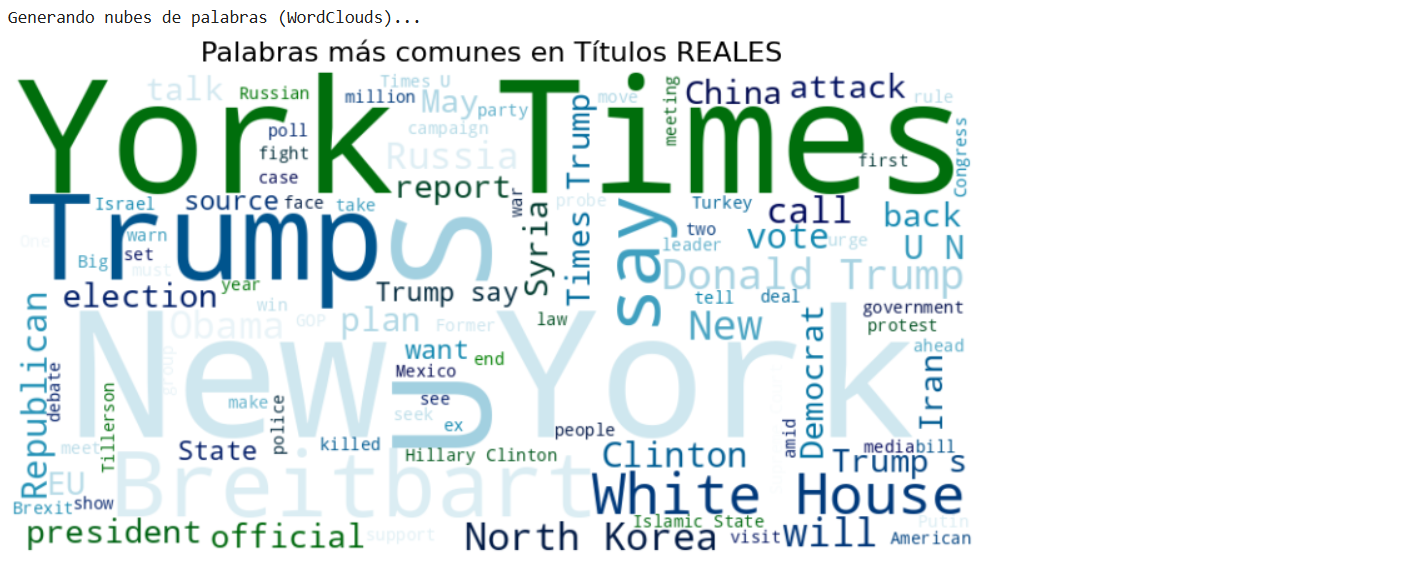

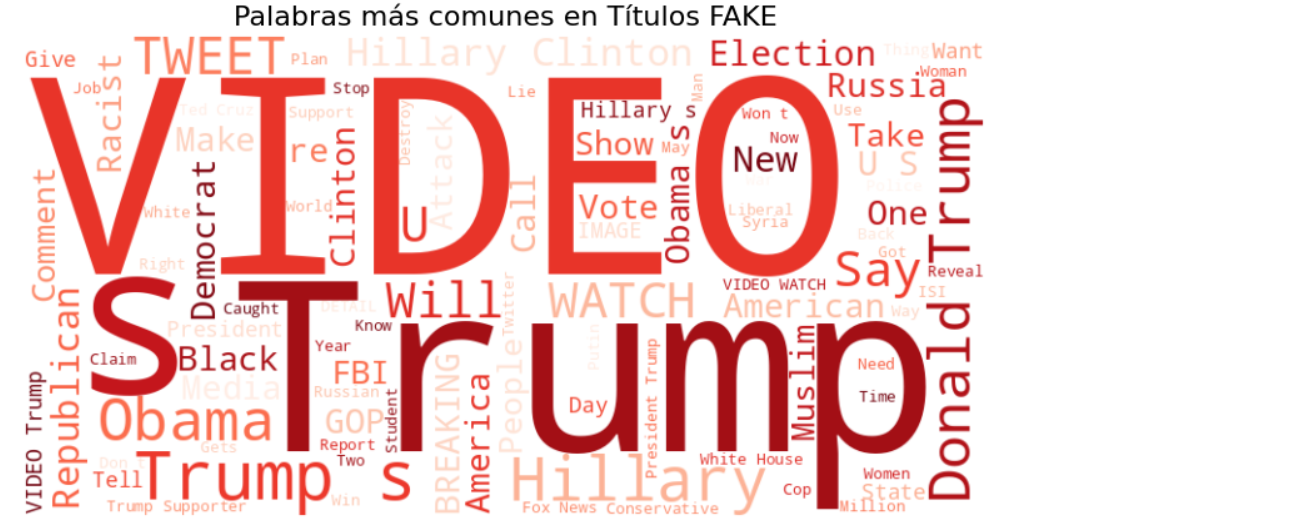

In [ ]:
# 7. BUSCADOR DE PALABRAS CLAVE ESPECÍFICAS
# -----------------------------------------------------------------
def analizar_termino(termino):
    filtro = df[df['title'].str.contains(termino, case=False, na=False)]
    if not filtro.empty:
        conteo = filtro['label'].value_counts(normalize=True) * 100
        print(f"\n El término '{termino}' aparece en {len(filtro)} títulos.")
        print(f"   Distribución: {conteo.to_dict()}")
    else:
        print(f"\n El término '{termino}' no se encontró.")

analizar_termino("Trump")
analizar_termino("VIDEO")
analizar_termino("Breaking")

El término 'Trump' aparece en 17433 títulos.
   Distribución: {1: 51.64343486491138, 0: 48.35656513508862}

 El término 'VIDEO' aparece en 6938 títulos.
   Distribución: {1: 96.98760449697319, 0: 3.012395503026809}

 El término 'Breaking' aparece en 841 títulos.
   Distribución: {1: 96.6706302021403, 0: 3.329369797859691}

In [ ]:
# 8. EXPORTACIÓN A CSV PARA EL SIGUIENTE PASO
# -----------------------------------------------------------------
print("\n Guardando dataset limpio...")
df.to_csv("WELFake_cleaned.csv", index=False)
print(" Archivo 'WELFake_cleaned.csv' creado. ¡Listo para BERT!")